In [1]:
from google.colab import drive, output
import torch
dv = torch.cuda.get_device_name(0)
print(dv)

drive.mount('/content/drive', force_remount=False)
repo = "Pytorch-animeGAN"
%cd "/content"
!rm -rf {repo}
!git clone https://github.com/Abel3369/{repo}
%cd {repo}
output.clear()

In [2]:
import os
import urllib

data_path = 'anime-gan.zip'
dataset_url = 'https://github.com/Abel3369/pytorch-animeGAN/releases/download/v2.0/dataset2.0.zip'

if not os.path.exists("/content/dataset"):
    !wget -O {data_path} {dataset_url}
    !unzip {data_path} -d /content
    !rm {data_path}

    if not os.path.exists("/content/dataset"):
        raise ValueError(f"Download Failed, {data_path}")

output.clear()

In [3]:
working_dir = '/content/drive/MyDrive/animeGAN'
print(f"You're running on {dv}")

You're running on Tesla T4


In [ ]:
!python3 train.py --real_image_dir '/content/dataset/train_photo'\
                  --anime_image_dir '/content/dataset/Shinkai'\
                  --batch 8\
                  --model v2\
                  --amp --cache\
                  --init_epochs 10\
                  --exp_dir {working_dir}\
                  --gan_loss lsgan\
                  --init_lr 0.0001\
                  --lr_g 0.00002\
                  --lr_d 0.00004\
                  --wadvd 300.0\
                  --wadvg 300.0\
                  --wcon 1.5\
                  --wgra 3.0\
                  --wcol 70.0\
                  --use_sn\
                  #--epochs 100
                  #--resume_G '/content/drive/MyDrive/animeGAN/GeneratorV2_train_photo_Shinkai.pt'\
                  #--resume_D '/content/drive/MyDrive/animeGAN/discriminator_train_photo_Shinkai.pt'\


# ==== Train Config ==== #
real_image_dir /content/dataset/train_photo
anime_image_dir /content/dataset/Shinkai
model v2
epochs 70
init_epochs 10
batch_size 8
exp_dir /content/drive/MyDrive/animeGAN
gan_loss lsgan
resume_G_init False
resume_G False
resume_D False
device cuda
use_sn True
cache True
amp True
save_interval 1
debug_samples 0
num_workers 2
lr_g 2e-05
lr_d 4e-05
init_lr 0.0001
wadvg 300.0
wadvd 300.0
wcon 1.5
wgra 3.0
wcol 70.0
d_layers 3
d_noise False
Use GPU: Tesla V100-SXM2-16GB
Init models...
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100% 548M/548M [00:07<00:00, 74.7MB/s]
Compute mean (R, G, B) from 2000 images
100% 2000/2000 [00:05<00:00, 399.52it/s]
Mean(B, G, R) of /content/dataset/Shinkai are [-3.43843497 -3.05691069  6.49534566]
Caching data..
100% 6656/6656 [00:21<00:00, 304.87it/s]
100% 2000/2000 [00:11<00:00, 171.34it/s]
100% 2000/2000 [00:03<00:00, 500.34it/s]
Cache saved to /u0

In [4]:
from inference import Predictor
predictor = Predictor(f"{working_dir}/GeneratorV2_train_photo_Shinkai.pt")

Optimizer stripped and saved to /content/drive/MyDrive/animeGAN/GeneratorV2_train_photo_Shinkai.pt


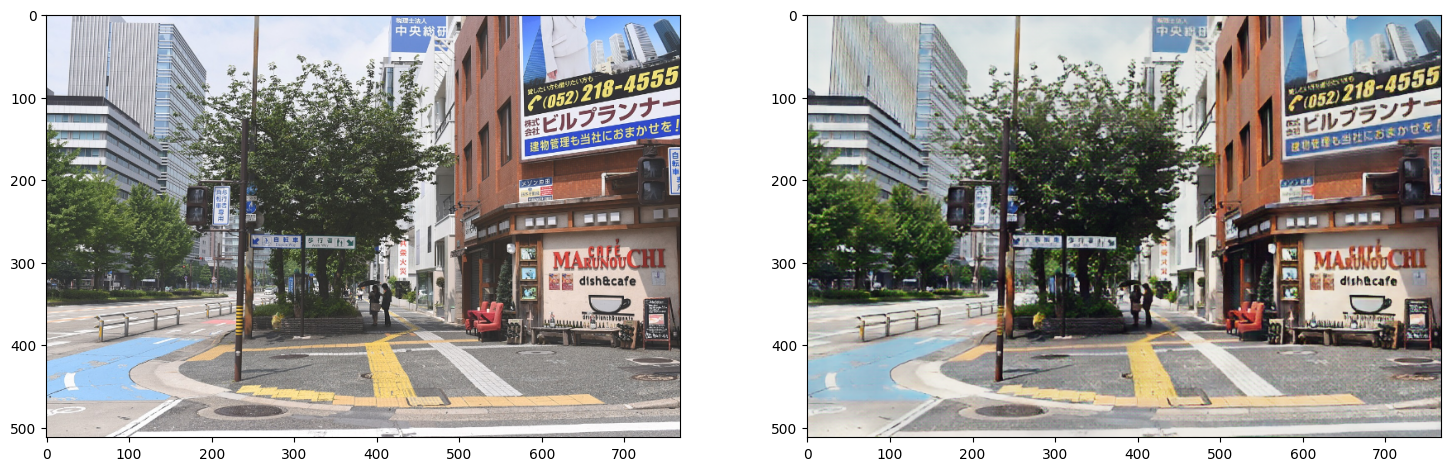

In [12]:
import cv2
import random
import matplotlib.pyplot as plt
import numpy as np

def random_img(img_dir):
    # p = '/content/test_4.png'
    p = os.path.join(img_dir, random.choice(os.listdir(img_dir)))
    return cv2.imread(p)[:, :, ::-1]

image = random_img('/content/dataset/test/HR_photo')
image = cv2.resize(image, (768, 512))

anime_output = predictor.transform(image)
anime_output = np.clip(anime_output, 0, 255)
anime_img = anime_output / 255.0

fig = plt.figure(figsize=(18, 25))
fig.add_subplot(1, 2, 1)
plt.imshow(image)
fig.add_subplot(1, 2, 2)
plt.imshow(anime_img[0])
plt.show()



Inference Image

In [13]:
!python3 inference_image.py --weight {working_dir}/GeneratorV2_train_photo_Shinkai.pt\
                            --src /content/dataset/test/HR_photo\
                            --out inference_images

Found 45 images in /content/dataset/test/HR_photo
100% 45/45 [00:22<00:00,  2.00it/s]


In [16]:
!cp -r /content/Pytorch-animeGAN/inference_images /content/drive/My\ Drive/animeGAN